<a href="https://colab.research.google.com/github/Frankensosege/MachineLearning/blob/main/03_1_Kneighbor_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
print(perch_length.shape, perch_weight.shape)

(56,) (56,)


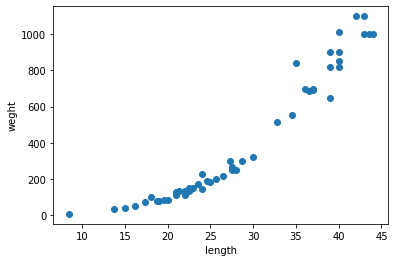

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weght')
plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
print(train_input.shape, test_input.shape, train_target.shape, test_target.shape)

(42,) (14,) (42,) (14,)


In [ ]:
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


reshape 테스트 재정의 하려는 행렬의 원소수와 원래 원소수가 같지 않으면 오류발생

In [ ]:
test_array = test_array.reshape(2, 2)
print(test_array.shape)
print(test_array)

(2, 2)
[[1 2]
 [3 4]]


reshape의 파라메터로 음수가 들어가는 경우 해당 열또는 행은 수는 상관하지 않는다. 음수가 아닌 놈을 기준으로 행열을 재배열

In [ ]:
test_array = test_array.reshape(1, -1)
print(test_array.shape)
print(test_array)

(1, 4)
[[1 2 3 4]]


In [ ]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


<center><b>결정계수 : </b></center>
</p>$$r^2=1-\frac{\sum(타겟 - 예측)^2(=예측오차)}{\sum(타겟 - 평균)^2(=평균오차)}$$
K-최근접 이웃 회귀: 최근접한 n개 샘플의 평균값을 계산</p>
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))

0.992809406101064


scikitlear을 이용하여 평균 절대 오차값을 계산</p>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

In [ ]:
from sklearn.metrics import mean_absolute_error

test_predict = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_predict)
print(mae)

19.157142857142862


테스트 데이터 셋의 표준점수보다 훈련 데이터셋의 표준점수가 크다(과소적합)

In [ ]:
print(knr.score(train_input, train_target))

0.9698823289099254


과소적합을 해결하기 위해 근접 이웃값을 3으로 조정

In [ ]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [ ]:
print(knr.score(test_input, test_target))

0.9746459963987609


적정한 모델의 복잡도를 찾기위해 최근접 이웃 수를 조정하여 돌려 본다.

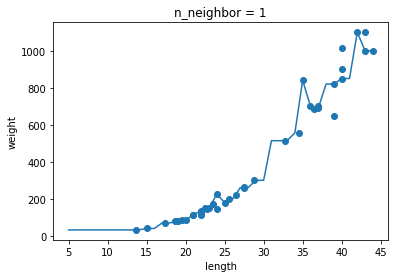

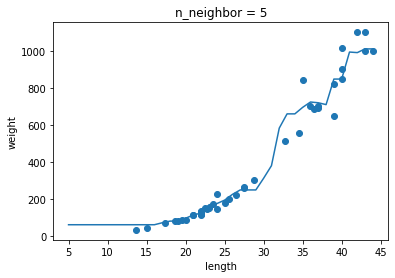

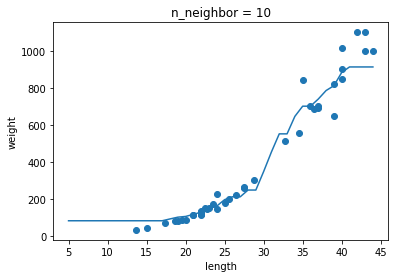

In [ ]:
knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 5, 10]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  prediction = knr.predict(x)
  prediction = prediction.reshape(-1, 1)
  # print(x)
  # print(prediction)
  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title('n_neighbor = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()